# Figure 5

The code in this tutorial is released under the [MIT License](https://opensource.org/licenses/MIT). All the content in this notebook is under a [CC-by 4.0 License](https://creativecommons.org/licenses/by/4.0/). 

Figure 5 of the main text shows a summary of all regulatory architectures discovered in the study.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import regseq.utils

# Set plotting style
regseq.utils.pboc_style_mpl()

Import data file contain transcription factor binding site locations.

In [2]:
df = pd.read_csv('TF_binding_locations_v2')
df.head()

,gene,start,end,type,identity,RNAP
0,thiM,-12,4,repressor,NaN,104
1,idnK,-48,-27,repressor,YgbI,103
2,ybeZ,15,29,repressor,NaN,144
3,WaaA-coaD,-53,-39,activator,NaN,102
4,dinJ,5,14,repressor,NaN,104


Read out all activator and repressor binding sites respectively.

In [14]:
df_act = df.loc[df['type'] == 'activator']
df_rep = df.loc[df['type'] == 'repressor']

Write a short helper function to transform values to `int` using Pandas.

In [15]:
def convert_int(s):
    return int(s)

Find the center of the binding sites.

In [16]:
mid_act = (df_act['end'].apply(convert_int) - df_act['start'].apply(convert_int))/2 + df_act['start'].apply(convert_int)
mid_rep = (df_rep['end'].apply(convert_int) - df_rep['start'].apply(convert_int))/2 + df_rep['start'].apply(convert_int)

Give the position relative to the RNAP binding site. RNAP value is the location of the -11 element of the RNAP binding site.

In [18]:
output_act = mid_act - df_act['RNAP'] -11 + 115
output_rep = mid_rep - df_rep['RNAP'] -11 + 115

Plot the results for activator binding sites.

<Figure size 252x180 with 0 Axes>

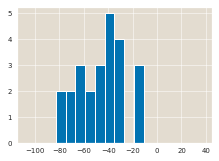

In [19]:
plt.clf()
fig,ax = plt.subplots()
plt.hist(output_act,bins=np.linspace(-115,45,21))
ax.set_xlim([-115,45])
plt.savefig('TF_binding_locations_act_june.eps',format='eps')
#plt.show()

Plot the results for repressor binding sites.

<Figure size 252x180 with 0 Axes>

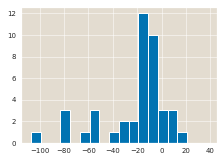

In [20]:
plt.clf()
fig,ax = plt.subplots()

plt.hist(output_rep,bins=np.linspace(-115,45,21))
ax.set_xlim([-115,45])
plt.savefig('TF_binding_locations_rep_june2020.eps',format='eps')
#plt.show()

Let's plot them together.

(-115, 45)

<Figure size 252x180 with 0 Axes>

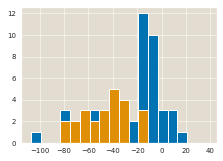

In [21]:
plt.clf()
fig,ax = plt.subplots()
plt.hist(output_rep,bins=np.linspace(-115,45,21), label="repressor")
plt.hist(output_act,bins=np.linspace(-115,45,21), label="activator")
ax.set_xlim([-115,45])